# Clean barchart with *pandas* and Matplotlib

### Wrangle, Explore & do some Data Visualization 

This is part of my beginner experience as a Data Scientist with IBM Data Science Professional Certificate.

In [2]:
# Import Primary Modules:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

 Read the csv file into a pandas dataframe

In [3]:
csv_path= 'https://cocl.us/datascience_survey_data'
df=pd.read_csv(csv_path, index_col = 0)
df

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


## Bar Chart

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Sort the dataframe in descending order of ***Very interested***

In [5]:
df_VI = df.sort_values(['Very interested'], ascending=False)
df_VI

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


In [6]:
Total=2233
df_percentage = df_VI.div(Total).round(2)
df_percentage

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,0.76,0.20,0.03
Machine Learning,0.73,0.21,0.03
Data Visualization,0.60,0.33,0.05
Big Data (Spark / Hadoop),0.60,0.33,0.06
Deep Learning,0.57,0.34,0.06
Data Journalism,0.19,0.48,0.27


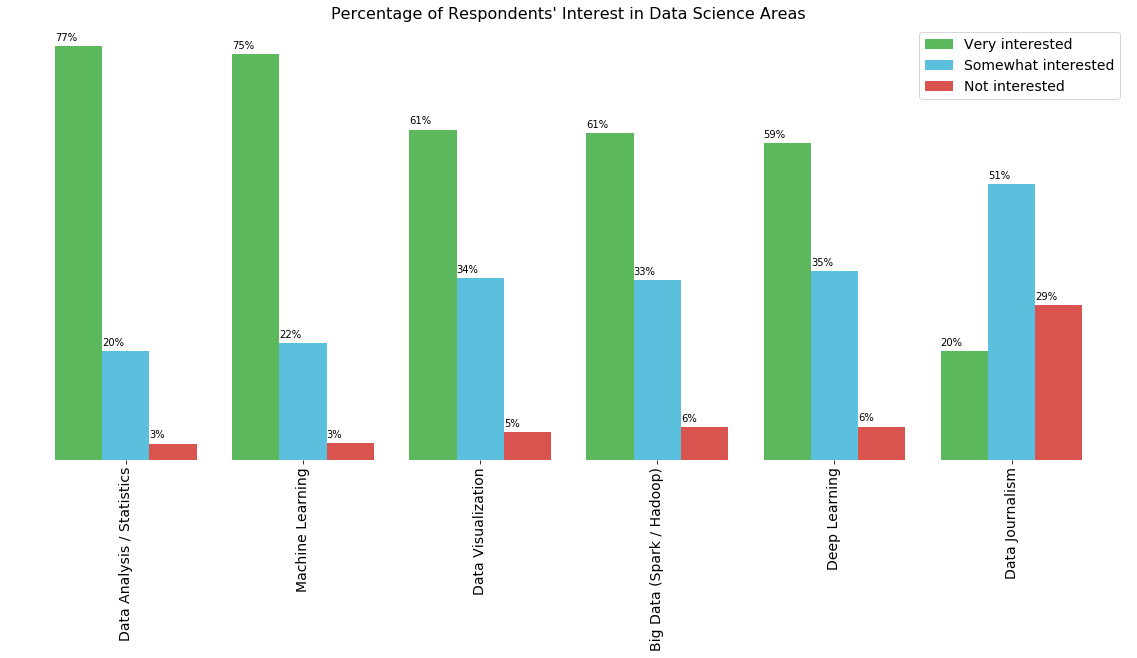

In [7]:
colors_list = ['#5cb85c','#5bc0de','#d9534f']

# Change this line to plot percentages instead of absolute values
ax = (df_percentage.div(df_percentage.sum(1), axis=0)).plot(kind='bar',figsize=(20,8),width = 0.8,color = colors_list,edgecolor=None)
plt.legend(labels=df_percentage.columns,fontsize= 14)
plt.title("Percentage of Respondents' Interest in Data Science Areas",fontsize= 16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))